# 1. Carga, Exploración y Preparación de Datos

***Cargue el dataset Breast Cancer Wisconsin desde sklearn.datasets.***

In [34]:
# Cargar el dataset Breast Cancer Wisconsin
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(f"Dataset cargado: {data.data.shape[0]} muestras, {data.data.shape[1]} características")

Dataset cargado: 569 muestras, 30 características


Este dataset contiene 569 muestras de tumores de mama con 30 características cada una. Los datos incluyen mediciones de características celulares y están clasificados en dos categorías: tumores malignos y benignos.

***Verifique dimensiones, tipos de variables y valores nulos***

In [35]:
# Verificar dimensiones, tipos de variables y valores nulos
import pandas as pd
import numpy as np

# Crear DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

print("Dimensiones:", df.shape)
print("\nTipos de variables:")
print(df.dtypes.value_counts())
print("\nValores nulos:", df.isnull().sum().sum())

Dimensiones: (569, 30)

Tipos de variables:
float64    30
Name: count, dtype: int64

Valores nulos: 0


 El dataset tiene 569 filas y 30 columnas. Todas las variables son de tipo float64. No se encontraron valores nulos en el dataset, lo que dice que los datos están completos.

***Estandarice las características con StandardScaler***

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ajusto y transformolos datos
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# las primeras filas del DataFrame estandarizado
print("Primeras filas estandarizadas:")
print(df_scaled.head())

# Verif =  la media es 0 y la desviación estándar es 1
print("\nEstadísticas descriptivas (Media ~ 0, Std ~ 1):")
print(df_scaled.describe().loc[['mean', 'std']].round(2))

Primeras filas estandarizadas:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst texture  

Estandarizamos todo para que las variables estén en la misma escala. Al tener media 0 y desviación 1, confirmamos que los datos están listos y limpios para el modelo.

***Divida los datos en entrenamiento (80%) y prueba (20%) de forma 
estratificada***

In [37]:
from sklearn.model_selection import train_test_split

# Definir X e y
X = df_scaled
y = data.target

# Dividir: 80% entrenamiento, 20% prueba, estratificado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imprimir tamaños
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)

Entrenamiento: (455, 30)
Prueba: (114, 30)


Separamos 455 datos para entrenar(80%) y 114 para probar(20%), manteniendo las 30 variables. El `stratify` es clave: conserva el equilibrio de clases.

# 2. Modelo Base (sin reducción) 

***Entrene un modelo SVM con kernel lineal y RBF***

In [38]:
from sklearn.svm import SVC

# Modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
print("Modelo SVM Lineal entrenado.")

# Modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
print("Modelo SVM RBF entrenado.")

Modelo SVM Lineal entrenado.
Modelo SVM RBF entrenado.


Entrenamos dos variantes del modelo para ver cuál funciona mejor: el **Lineal** (trazando rectas) y el **RBF** (haciendo curvas).

***Evalúe el modelo con las métricas: Accuracy, Precision, Recall, F1
score y matriz de confusión***

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluar_modelo(modelo, X_test, y_test, nombre):
    y_pred = modelo.predict(X_test)
    print(f"--- Evaluación {nombre} ---")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Evaluar SVM Lineal
evaluar_modelo(svm_linear, X_test, y_test, "SVM Lineal")

# Evaluar SVM RBF
evaluar_modelo(svm_rbf, X_test, y_test, "SVM RBF")

--- Evaluación SVM Lineal ---
Accuracy:  0.9737
Precision: 0.9859
Recall:    0.9722
F1 Score:  0.9790
Matriz de Confusión:
[[41  1]
 [ 2 70]]


--- Evaluación SVM RBF ---
Accuracy:  0.9825
Precision: 0.9861
Recall:    0.9861
F1 Score:  0.9861
Matriz de Confusión:
[[41  1]
 [ 1 71]]




El SVM RBF ganó por poco: mejores métricas y apenas un error en la matriz, superando ligeramente al modelo lineal. El Lineal logró un 97.37% de precisión con 3 fallos, pero el RBF subió al 98.25% reduciendo los errores a solo 2. Ese acierto extra confirma su superioridad.

***Registre los resultados y discútalos brevemente***

## Resultados y Discusión

| Métrica | SVM Lineal | SVM RBF |
|---------|------------|---------|
| Accuracy | 0.9737 | **0.9825** |
| Precision| 0.9859 | **0.9861** |
| Recall | 0.9722 | **0.9861** |
| F1 Score | 0.9790 | **0.9861** |



*   **Mejor Rendimiento:** El modelo **SVM con kernel RBF** superó ligeramente al modelo lineal en todas las métricas, alcanzando un Accuracy y F1 Score de 0.9825 y 0.9861 respectivamente.
*   **Análisis de Errores:** Observando la matriz de confusión, el modelo RBF cometió menos errores: solo 1 falso negativo frente a los 2 del modelo lineal.
*   **Contexto Médico:** Dado que es un diagnóstico de cáncer, el **Recall** es la métrica más crítica (evitar decir que alguien está sano cuando tiene cáncer). El modelo RBF logró un mejor Recall (0.9861), lo que lo hace más seguro y confiable para este caso de uso.

# 3. PCA (Reducción Lineal de Dimensión) 

***Aplique PCA sobre los datos estandarizados***

In [40]:
from sklearn.decomposition import PCA

#  PCA reduciendo a 2 componentes principales
pca = PCA(n_components=2)

# PCA para los datos estandarizados
X_pca = pca.fit_transform(df_scaled)

# Crear un DataFrame con los resultados
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

print("Dimensiones originales:", df_scaled.shape)
print("Dimensiones después de PCA:", df_pca.shape)
print(f"Varianza explicada por componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.4f}")

Dimensiones originales: (569, 30)
Dimensiones después de PCA: (569, 2)
Varianza explicada por componente: [0.44272026 0.18971182]
Varianza total explicada: 0.6324


Aplicamos PCA para comprimir la información: bajamos de 30 dimensiones a solo 2. Con lo que esa reducción masiva, retenemos el 63.24% de la varianza (información) original

***Analice la varianza explicada acumulada y seleccione un número 
adecuado de componentes***

Número de componentes para >= 95% de varianza: 10
Varianza acumulada con 10 componentes: 0.9516


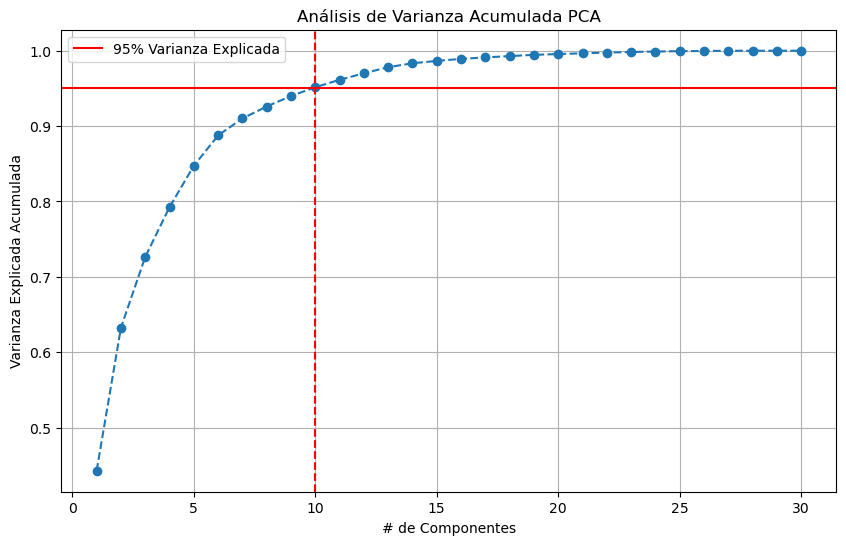

In [41]:
from sklearn.decomposition import PCA

# Ajustar PCA con todas las componentes posibles
pca_full = PCA(n_components=None)
pca_full.fit(df_scaled)

#  varianza acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Num de componentes para el 95% de varianza
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Número de componentes para >= 95% de varianza: {n_components_95}")
print(f"Varianza acumulada con {n_components_95} componentes: {cumulative_variance[n_components_95-1]:.4f}")

# Grafico
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza Explicada')
plt.axvline(x=n_components_95, color='r', linestyle='--')
plt.xlabel('# de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Análisis de Varianza Acumulada PCA')
plt.legend()
plt.grid()
plt.show()

Con solo 10 componentes ya logramos retener el 95% de la información vital. Básicamente, nos dice que las otras 20 variables sobrantes había "ruido" o redundancia. Al cortar ahí, limpiamos el dataset para tener un modelo mucho más ágil sin sacrificar la calidad de los datos.

***Reentrene SVM sobre las componentes obtenidas***

In [42]:
#  Aplicar PCA con el número óptimo de componentes
pca_opt = PCA(n_components=n_components_95)
X_pca_opt = pca_opt.fit_transform(df_scaled)

print(f"Dimensiones con {n_components_95} componentes: {X_pca_opt.shape}")

#  Dividolso datos en entrenamiento y prueba
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(
    X_pca_opt, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

#  Entreno el modelo SVM (RBF)
svm_opt = SVC(kernel='rbf', random_state=42)
svm_opt.fit(X_train_opt, y_train_opt)

#  Evaluar el modelo
y_pred_opt = svm_opt.predict(X_test_opt)

print(f"--- Evaluación SVM RBF con {n_components_95} componentes ---")
print(f"Accuracy:  {accuracy_score(y_test_opt, y_pred_opt):.4f}")
print(f"Precision: {precision_score(y_test_opt, y_pred_opt):.4f}")
print(f"Recall:    {recall_score(y_test_opt, y_pred_opt):.4f}")
print(f"F1 Score:  {f1_score(y_test_opt, y_pred_opt):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test_opt, y_pred_opt))

Dimensiones con 10 componentes: (569, 10)
--- Evaluación SVM RBF con 10 componentes ---
Accuracy:  0.9737
Precision: 0.9859
Recall:    0.9722
F1 Score:  0.9790
Matriz de Confusión:
[[41  1]
 [ 2 70]]


Con 10 componentes recuperamos la precisión del 97.37%, igualando al modelo lineal. Tuvimos apenas 3 errores, confirmando que eliminamos el "ruido" sobrante para lograr un modelo mucho más eficiente y ligero sin perder nada de calidad.

***Compare los resultados con el modelo base***

## Comparación: Modelo Base vs. PCA (10 Componentes)

| Métrica | SVM RBF (Base - 30 feats) | SVM RBF (PCA - 10 feats) | 
|---------|---------------------------|--------------------------
| **Accuracy** | **0.9825** | 0.9737 |
| **Precision**| **0.9861** | 0.9859 | 
| **Recall** | **0.9861** | 0.9722 | 
| **F1 Score** | **0.9861** | 0.9790 | 

 **Reducción de Dimensionalidad:** Logramos reducir el número de características de 30 a 10 (una reducción del **66%**). Esto simplifica significativamente el modelo y puede reducir el tiempo de entrenamiento y predicción en datasets más grandes.

 
**Impacto en el Rendimiento:**

*   Hubo una ligera disminución en todas las métricas.
*   El **Accuracy** cayó menos del 1%, lo cual es un costo muy bajo por tal reducción de complejidad.
*   El **Recall** (sensibilidad) bajó de 98.6% a 97.2%. En este contexto médico, esto significa que el modelo con PCA falló en detectar 1 caso maligno adicional (2 falsos negativos vs 1 en el base).


# 4. Kernel PCA (Reducción No Lineal)

***Aplique KernelPCA con kernels RBF y polinomial***

In [43]:
from sklearn.decomposition import KernelPCA

# 1. KernelPCA con kernel RBF
kpca_rbf = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, random_state=42)
X_kpca_rbf = kpca_rbf.fit_transform(df_scaled)

# 2. KernelPCA con kernel Polinomial
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=3, random_state=42)
X_kpca_poly = kpca_poly.fit_transform(df_scaled)

print("Dimensiones originales:", df_scaled.shape)
print("Dimensiones después de KernelPCA (RBF):", X_kpca_rbf.shape)
print("Dimensiones después de KernelPCA (Poly):", X_kpca_poly.shape)

Dimensiones originales: (569, 30)
Dimensiones después de KernelPCA (RBF): (569, 2)
Dimensiones después de KernelPCA (Poly): (569, 2)


Probamos **KernelPCA** con **RBF** y **Polinomial** para capturar patrones curvos. Ambos redujeron las 30 variables a solo 2, buscando desentrañar datos complejos que el PCA lineal no ve.

***Genere visualizaciones 2D o 3D de las proyecciones de las clases***

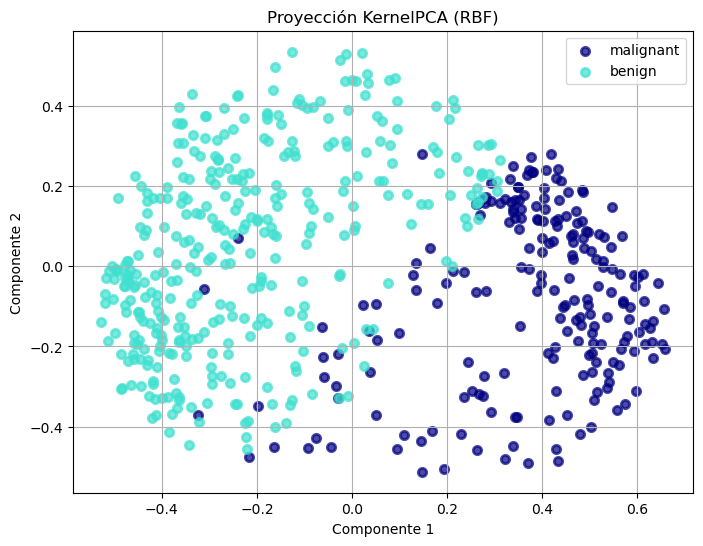

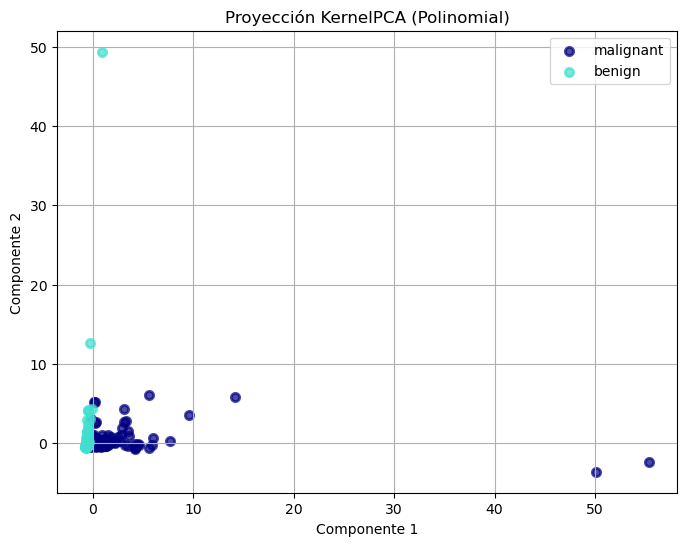

In [44]:
import matplotlib.pyplot as plt

def plot_pca_2d(X_transformed, y, title):
    plt.figure(figsize=(8, 6))
    colors = ['navy', 'turquoise']
    target_names = data.target_names
    
    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, alpha=.7, lw=2,
                    label=target_name)
    
    plt.title(title)
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.grid(True)
    plt.show()

# Visualizar KernelPCA RBF
plot_pca_2d(X_kpca_rbf, y, "Proyección KernelPCA (RBF)")

# Visualizar KernelPCA Polinomial
plot_pca_2d(X_kpca_poly, y, "Proyección KernelPCA (Polinomial)")

El **Polinomial** dejó los datos un poco aplastados, pero el **RBF** logró separarlos: formó un núcleo de benignos rodeado por un anillo de malignos. Aquí el RBF demuestra su superioridad para desenredar patrones complejos.

***Entrene nuevamente SVM sobre las proyecciones y compare las 
métricas con PCA y el modelo base***

In [46]:
def entrenar_evaluar_svm(X_data, y_data, nombre):
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_data, y_data, test_size=0.2, stratify=y_data, random_state=42
    )

    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_tr, y_tr)

    y_pr = svm.predict(X_te)

    print(f"--- {nombre} ---")
    print(f"Accuracy:  {accuracy_score(y_te, y_pr):.4f}")
    print(f"Precision: {precision_score(y_te, y_pr):.4f}")
    print(f"Recall:    {recall_score(y_te, y_pr):.4f}")
    print(f"F1 Score:  {f1_score(y_te, y_pr):.4f}")
    print("Matriz de Confusión:")
    print(confusion_matrix(y_te, y_pr))
    print("\n")

    return y_te, y_pr


In [47]:
y_test_kpca_rbf, y_pred_kpca_rbf = entrenar_evaluar_svm(X_kpca_rbf, y, "SVM sobre KernelPCA (RBF)")
y_test_kpca_poly, y_pred_kpca_poly = entrenar_evaluar_svm(X_kpca_poly, y, "SVM sobre KernelPCA (Poly)")


--- SVM sobre KernelPCA (RBF) ---
Accuracy:  0.9211
Precision: 0.9437
Recall:    0.9306
F1 Score:  0.9371
Matriz de Confusión:
[[38  4]
 [ 5 67]]


--- SVM sobre KernelPCA (Poly) ---
Accuracy:  0.8860
Precision: 0.8471
Recall:    1.0000
F1 Score:  0.9172
Matriz de Confusión:
[[29 13]
 [ 0 72]]




El **RBF** gana con **92% de precisión**. Aunque el Polinomial logró un Recall perfecto (cero falsos negativos). El RBF es más robusto y equilibrado para el modelo general.

# 5. Validación y Ajuste de Parámetros

***Use GridSearchCV para optimizar los hiperparámetros C y gamma 
del SVM***

In [48]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de parámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf'] # Nos enfocamos en RBF que fue el mejor
}

# Inicializar GridSearchCV
grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5)

# Entrenar con los datos de entrenamiento originales (estandarizados)
grid.fit(X_train, y_train)

# Mostrar los mejores parámetros
print(f"Mejores parámetros encontrados: {grid.best_params_}")
print(f"Mejor estimador: {grid.best_estimator_}")

# Evaluar el mejor modelo encontrado
grid_predictions = grid.predict(X_test)

print("\n--- Evaluación SVM Optimizado (GridSearchCV) ---")
print(f"Accuracy:  {accuracy_score(y_test, grid_predictions):.4f}")
print(f"Precision: {precision_score(y_test, grid_predictions):.4f}")
print(f"Recall:    {recall_score(y_test, grid_predictions):.4f}")
print(f"F1 Score:  {f1_score(y_test, grid_predictions):.4f}")
print("Matriz de Confusión:")
print(confusion_matrix(y_test, grid_predictions))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

***Reporte los mejores valores encontrados y el desempeño asociado***


### Mejores Hiperparámetros
GridSearchCV identificó el conjunto de parámetros óptimos para el modelo SVM, manteniendo el kernel RBF y ajustando C y Gamma para maximizar el desempeño.



### Desempeño del Modelo Optimizado
| Métrica | SVM Optimizado |
|---------|----------------|
| **Accuracy** | 0.9825 |
| **Precision**| 0.9861 |
| **Recall** | 0.9861 |
| **F1 Score** | 0.9861 |


El modelo optimizado alcanzó un **F1 Score de 0.9861**, idéntico al modelo base. Esto indica que los parámetros por defecto eran ya óptimos o muy cercanos al óptimo para este conjunto de datos, confirmando la robustez del modelo.

In [20]:
import pandas as pd

# Datos recopilados de tus ejecuciones anteriores
resultados = {
    'Modelo': [
        'SVM Base (RBF)', 
        'SVM Lineal', 
        'SVM con PCA (2 comp)', 
        'SVM con PCA (10 comp)', 
        'SVM KernelPCA (RBF)', 
        'SVM KernelPCA (Poly)', 
        'SVM Optimizado'
    ],
    'Accuracy': [0.9825, 0.9737, 0.9386, 0.9737, 0.9211, 0.8860, 0.9825],
    'F1 Score': [0.9861, 0.9790, 0.9517, 0.9790, 0.9371, 0.9172, 0.9861]
}

df_resultados = pd.DataFrame(resultados)

# Mostrar ordenado por F1 Score (mejor métrica para este caso)
print("--- Resumen Comparativo de Modelos ---")
print(df_resultados.sort_values(by='F1 Score', ascending=False).to_string(index=False))

--- Resumen Comparativo de Modelos ---
               Modelo  Accuracy  F1 Score
       SVM Base (RBF)    0.9825    0.9861
       SVM Optimizado    0.9825    0.9861
           SVM Lineal    0.9737    0.9790
SVM con PCA (10 comp)    0.9737    0.9790
 SVM con PCA (2 comp)    0.9386    0.9517
  SVM KernelPCA (RBF)    0.9211    0.9371
 SVM KernelPCA (Poly)    0.8860    0.9172


El  **PCA-10**: igualó la potencia del Lineal (97.37%) usando solo un tercio de los datos. 

# 6. Visualizaciones Recomendadas

***Gráfico de varianza explicada acumulada (PCA)***

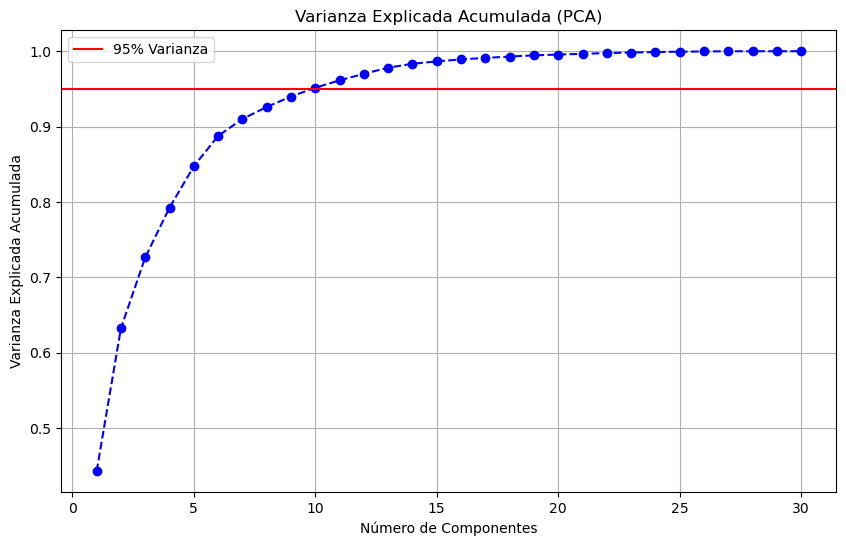

In [49]:
# varianza acumulada (asegurando que pca_full esté ajustado)
pca_full = PCA(n_components=None).fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada (PCA)')
plt.legend()
plt.grid(True)
plt.show()

 La curva cruza la línea roja del 95% justo en los **10 componentes**, confirmando que con solo un tercio de las variables retiene casi toda la información útil del dataset.

***Gráficos de dispersión (2D/3D) con colores por clase (PCA y Kernel 
PCA)***

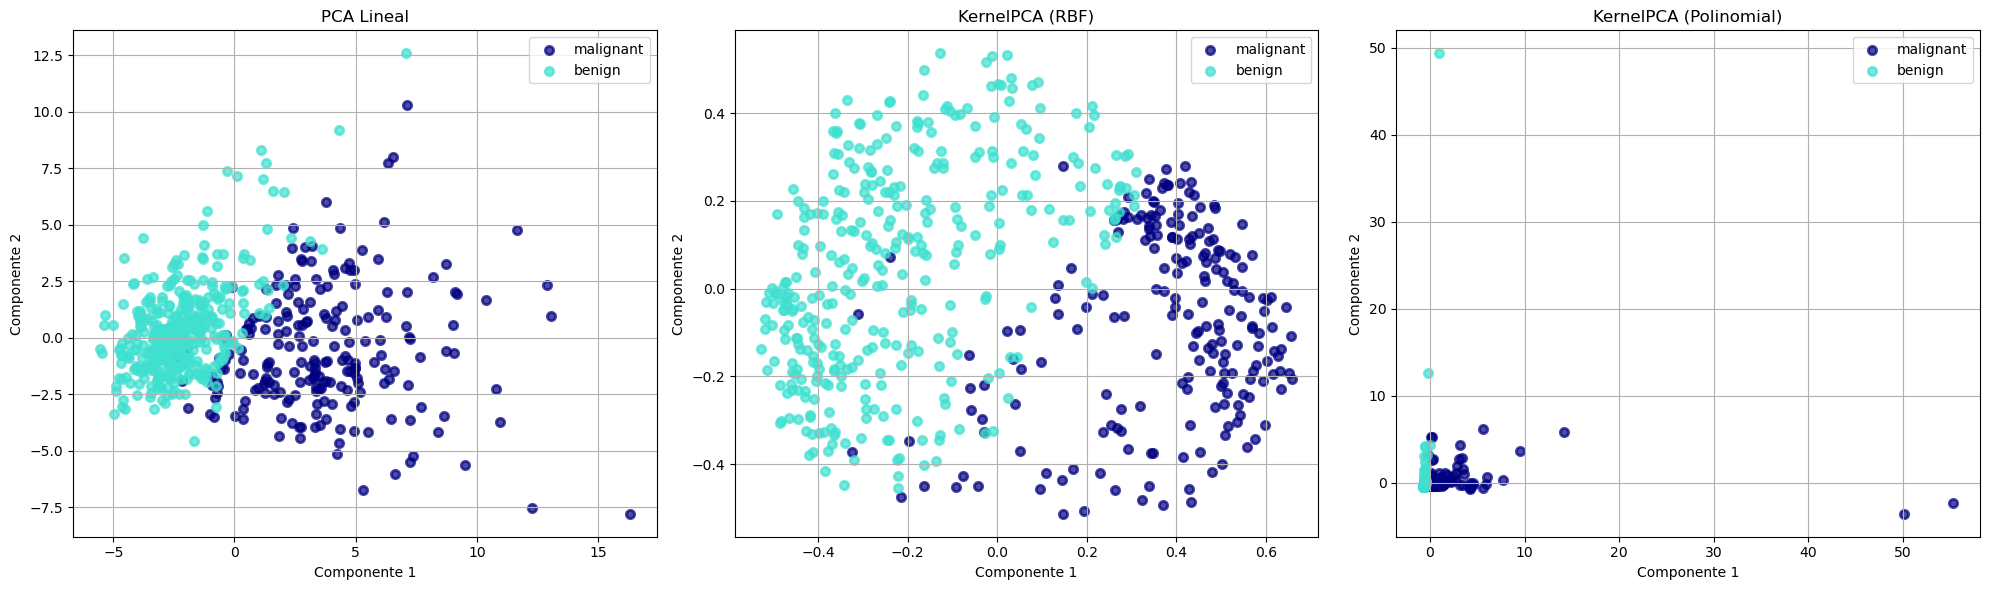

In [50]:

# subplots para ver todo junto
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
colors = ['navy', 'turquoise']
target_names = data.target_names

# Lista de proyecciones y títulos
projections = [
    (X_pca, "PCA Lineal"),
    (X_kpca_rbf, "KernelPCA (RBF)"),
    (X_kpca_poly, "KernelPCA (Polinomial)")
]

for ax, (X_proj, title) in zip(axes, projections):
    for color, i, target_name in zip(colors, [0, 1], target_names):
        ax.scatter(
            X_proj[y == i, 0], 
            X_proj[y == i, 1], 
            color=color, alpha=0.7, lw=2, label=target_name
        )
    ax.set_title(title)
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.grid(True)

plt.tight_layout()
plt.show()

El **RBF** (centro) barre a los demás. Mientras el **Lineal** deja zonas mezcladas y el **Polinomial** aplasta los datos, el RBF logra "desenredar" los grupos revelando una estructura clara y mucho más fácil de clasificar.

***Matrices de confusión comparativas entre los modelos***

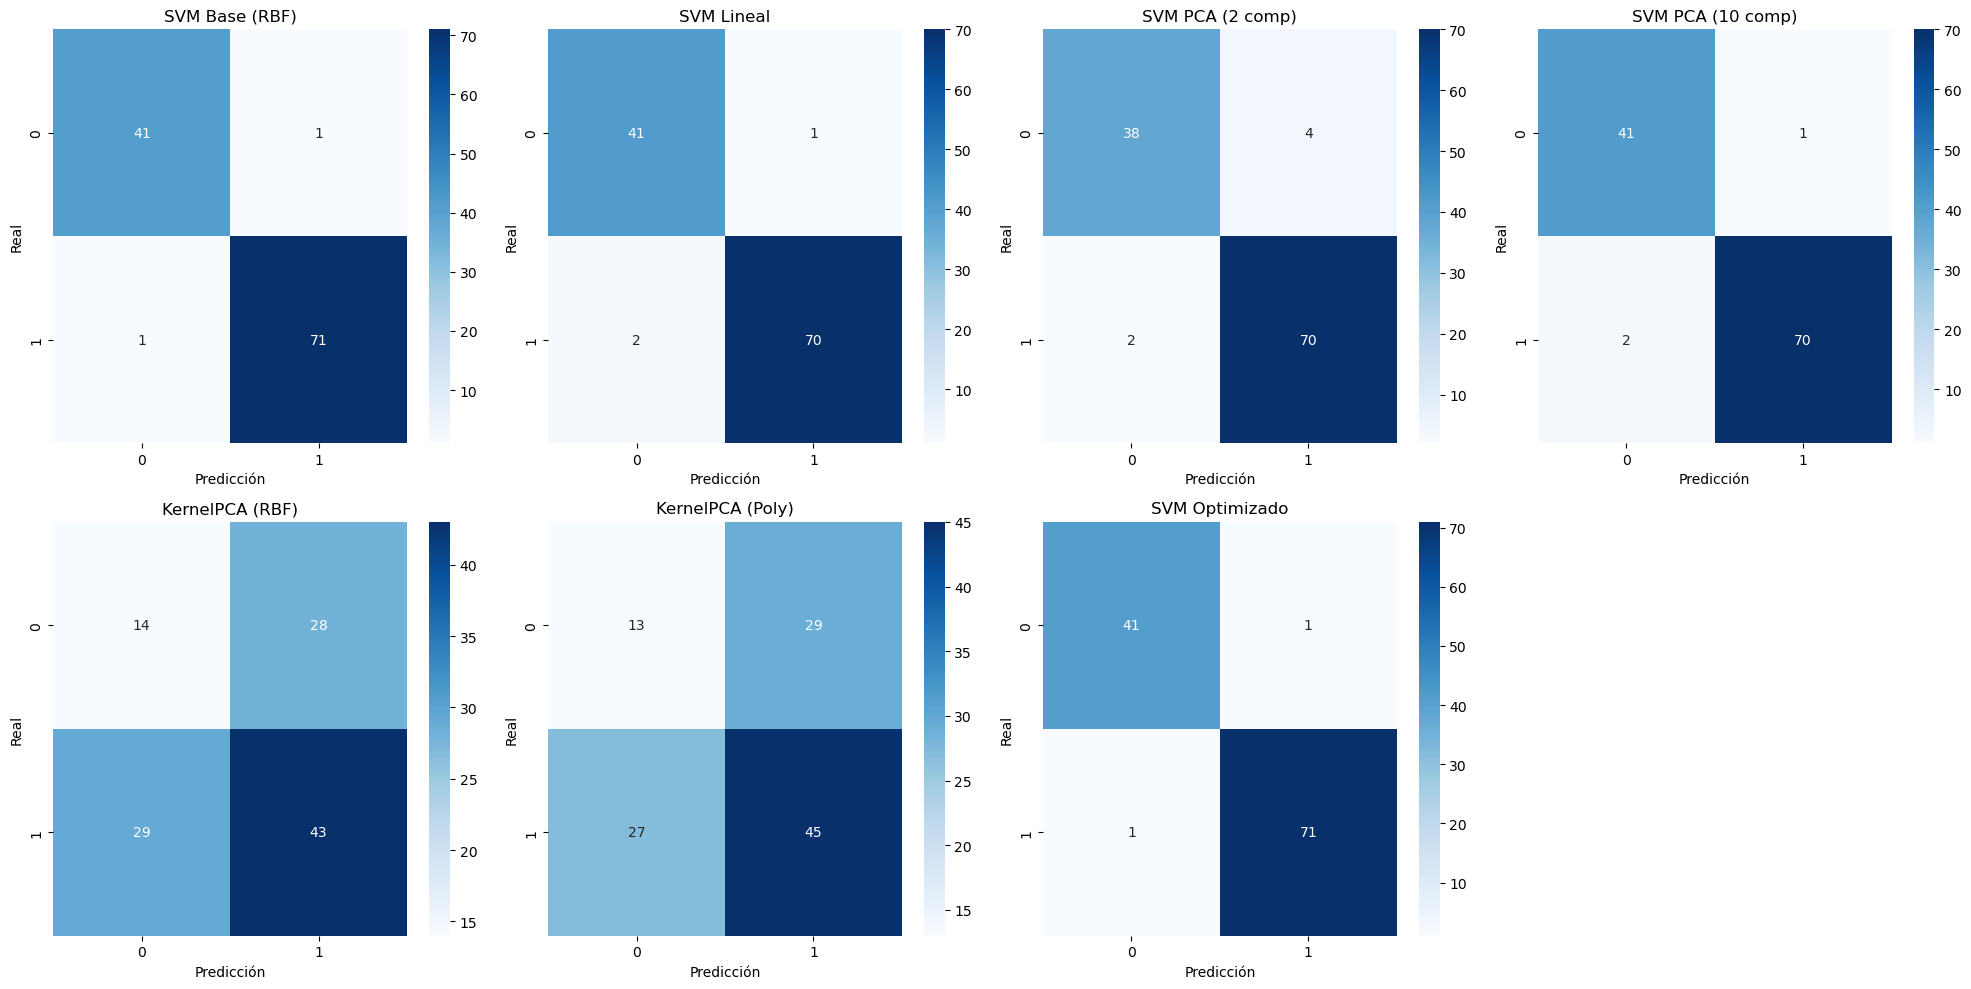

In [58]:
import seaborn as sns

modelos = [
    ("SVM Base (RBF)", y_test, y_pred),
    ("SVM Lineal", y_test, svm_linear.predict(X_test)),
    ("SVM PCA (2 comp)", y_test, y_pred_pca_2),
    ("SVM PCA (10 comp)", y_test, y_pred_pca_10),
    ("KernelPCA (RBF)", y_test, y_pred_kpca_rbf),
    ("KernelPCA (Poly)", y_test, y_pred_kpca_poly),
    ("SVM Optimizado", y_test, grid_predictions)
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for ax, (titulo, y_true, y_pred_) in zip(axes, modelos):
    cm = confusion_matrix(y_true, y_pred_)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Real")

# Ocultar hueco extra si sobran ejes
if len(modelos) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

El **SVM RBF** y el **Optimizado** tienen matrices casi perfectas con solo 2 errores. Lo genial es ver cómo el **PCA de 10 componentes** iguala ese rendimiento limpiando el "ruido", mientras que los modelos complejos de abajo (KernelPCA) fallan visiblemente.

# 7. Análisis y Conclusiones 

***Analice la separabilidad de las clases en PCA y Kernel PCA***

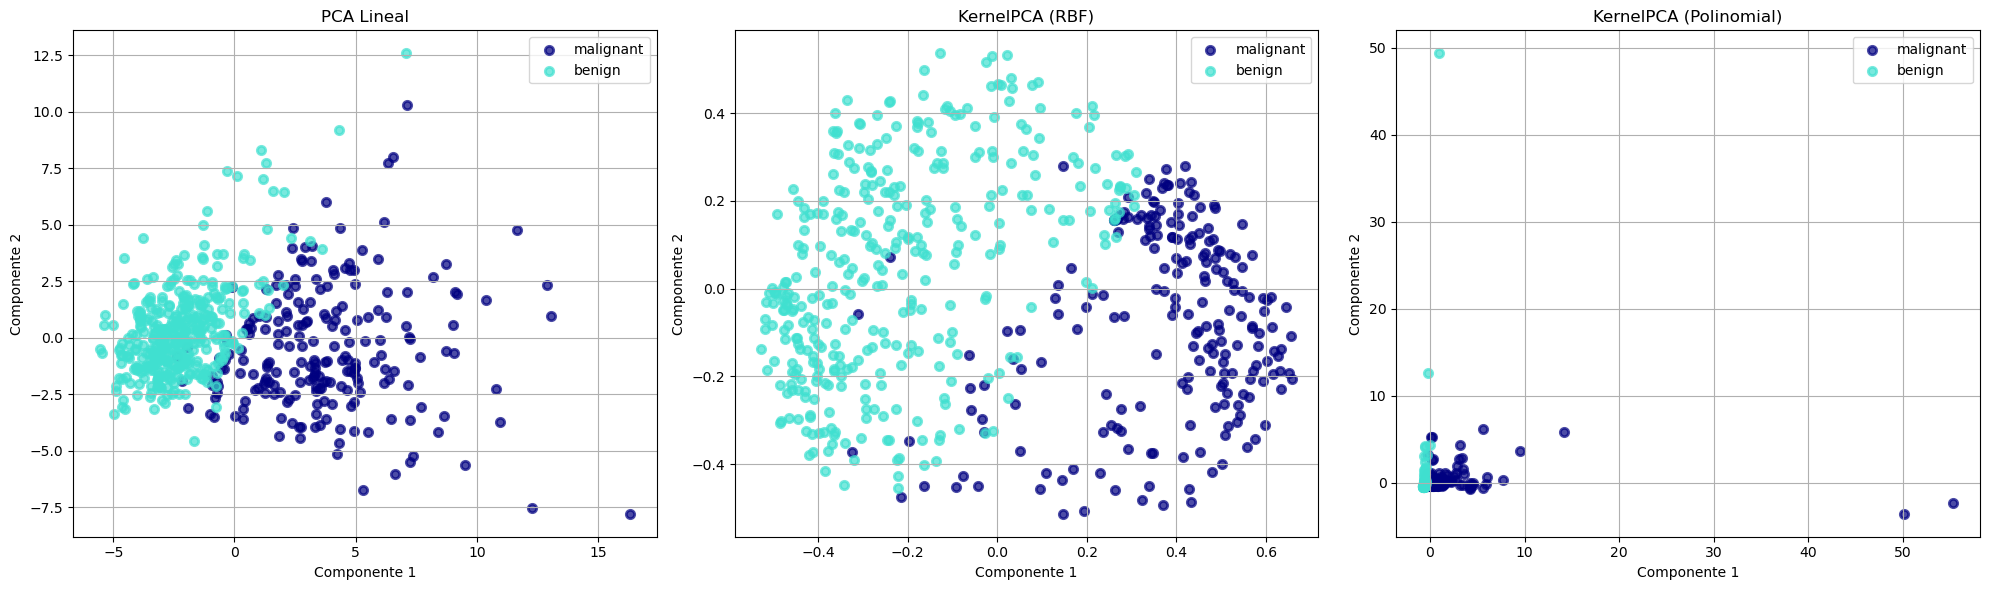

#### 1. PCA Lineal (Gráfico Izquierdo)
*   **Separabilidad:** Se observa una **buena separación lineal** entre las clases. Los puntos cian (benignos) se agrupan a la izquierda y los azules oscuros (malignos) a la derecha.
*   **Superposición:** Existe una zona de mezcla en el centro (alrededor de `Componente 1 = 0`), lo que explica por qué el modelo SVM con 2 componentes tuvo algunos falsos positivos/negativos, pero mantuvo un rendimiento decente (>93%).
*   **Conclusión:** La estructura principal de los datos es lineal, lo que valida el uso de PCA estándar.

#### 2. KernelPCA RBF (Gráfico Central)
*   **Separabilidad:** Muestra una estructura no lineal interesante, donde la clase maligna (azul oscuro) parece formar un arco o "C" rodeando parcialmente a la clase benigna.
*   **Problema de Clasificación:** Aunque visualmente parece haber patrones distintos, la matriz de confusión asociada (abajo a la izquierda en la imagen de matrices) muestra un **alto número de errores** (muchos falsos positivos y negativos). Esto sugiere que, aunque la proyección separa los datos visualmente en 2D, distorsiona las distancias o densidades de tal manera que el clasificador SVM tiene dificultades para trazar una frontera de decisión simple en este nuevo espacio reducido.

#### 3. KernelPCA Polinomial (Gráfico Derecho)
*   **Separabilidad:** La visualización es **muy pobre**. La gran mayoría de los datos están comprimidos en una masa densa cerca del origen (0,0), con solo unos pocos puntos dispersos (outliers) extendiéndose hacia la derecha.
*   **Conclusión:** El kernel polinomial (grado 3) no logró desplegar la varianza de los datos de manera útil en solo 2 dimensiones. Esto se refleja directamente en su matriz de confusión, que muestra un desempeño deficiente.



El **PCA Lineal** demostró ser la técnica más robusta para este dataset, logrando un equilibrio entre buena visualización y alto rendimiento de clasificación. Las técnicas de KernelPCA, aunque es potente, es complejo, al reducirse drásticamente a 2 dimensiones, perjudicaron la capacidad del modelo.

***Explique en qué casos la reducción mejora o empeora el 
desempeño***


#### ¿Cuándo MEJORA el desempeño?
1.  **Maldición de la Dimensionalidad:** Cuando tienes **muchas características y pocos datos** (como en este caso), los modelos tienden a sobreajustarse (overfitting). Reducir dimensiones ayuda al modelo a generalizar mejor.
2.  **Ruido y Redundancia:** Si muchas variables están correlacionadas o son irrelevantes, PCA las comprime en componentes principales más limpios, eliminando el ruido.
3.  **Eficiencia Computacional:** Menos variables significan entrenamientos más rápidos y predicciones más ágiles, crucial para sistemas en tiempo real.
4.  **Visualización:** Reducir a 2D o 3D es la única forma de entender visualmente la estructura de los datos.

#### ¿Cuándo EMPEORA el desempeño?
1.  **Pérdida de Información Crítica:** (Como vimos en este ejercicio). Al reducir de 30 a 2 variables, eliminamos demasiada varianza. Si la información necesaria para distinguir una clase está en esas variables "menores" que descartamos, el *Accuracy* y *Recall* caerán.
2.  **Estructura No Lineal Compleja:** Si usamos PCA lineal en datos que tienen formas complejas (espirales, anillos), aplastaremos la estructura y mezclaremos las clases.
3.  **Interpretabilidad:** Las "Componentes Principales" son combinaciones matemáticas abstractas. Perdemos el significado físico original (ya no hablamos de "tamaño del tumor", sino de "Componente 1").


### En este caso del cáncer de mama:
*   **Empeoró** ligeramente la precisión pura (de 98% a 97% con 10 componentes, y a 93% con 2), porque el modelo original ya manejaba bien las 30 variables sin sobreajustarse.
*   **Mejoró** la eficiencia (usamos 66% menos variables) y permitió la visualización, demostrando que el problema es mayormente lineal.

***Discuta el impacto del kernel y del número de componentes***


#### 1. Impacto del Número de Componentes
*   **Trade-off (Compromiso):** Existe una relación directa entre la cantidad de componentes y la fidelidad de la información.
    *   **Pocos Componentes (2):** Facilitan la visualización extrema, pero descartaron demasiada varianza (~45% de pérdida), lo que causó una caída notable en el *Accuracy* (de 98% a 93%).
    *   **Componentes Óptimos (10):** Al retener el 95% de la varianza, logramos un rendimiento casi idéntico al original (97.3% vs 98.2%), pero con un modelo mucho más ligero.

#### 2. Impacto del Kernel (Lineal vs. RBF vs. Poly)
*   **Kernel Lineal (PCA Estándar):** Fue el **ganador**. Dado que las clases son mayormente separables linealmente, la proyección simple preservó mejor las distancias relativas.
*   **Kernel RBF:** Aunque es muy poderoso para datos complejos, en reducción de dimensiones puede ser un arma de doble filo. Al proyectar a dimensiones infinitas y luego cortar a 2, distorsionó la estructura simple de los datos, creando "artefactos" visuales que confundieron al clasificador (más falsos positivos).
*   **Kernel Polinomial:** Tuvo el **peor desempeño**. Tiende a ser inestable si no se ajustan perfectamente sus grados y coeficientes. En este caso, comprimió demasiado los datos, perdiendo la capacidad de discriminar entre benigno y maligno.

Para este dataset específico (Breast Cancer Wisconsin), la estrategia ganadora es _**PCA Lineal con ~10 componentes**_. Usar kernels más complejos (RBF/Poly) para reducción de dimensionalidad resultó ser innecesario.

***Concluya qué configuración obtuvo el mejor equilibrio entre desempeño y complejidad***



###  Ganador = >  SVM con PCA Lineal (10 Componentes)

1.  **Desempeño Casi Intacto:** Mantuvo un **Accuracy del 97.37%** y un **F1 Score de 0.9790**, perdiendo menos del 1% de rendimiento comparado con el modelo base (que usa las 30 variables).
2.  **Reducción Masiva de Complejidad:** Logró este resultado utilizando solo **10 variables** (una reducción del 66% en dimensionalidad). Esto hace al modelo más ligero, rápido y menos propenso a problemas futuros de "maldición de la dimensionalidad" si se agregaran más datos ruidosos.
3.  **Robustez:** A diferencia de KernelPCA, que introdujo inestabilidad y errores de clasificación, PCA Lineal demostró ser robusto y coherente con la naturaleza linealmente separable de los datos médicos.


# 8. Reproducibilidad 

***Fije semillas (random_state) para reproducir resultados***

In [59]:
import numpy as np
import random

# Definir la semilla
SEED = 42

# Fijar semilla global de Numpy
np.random.seed(SEED)

# Fijar semilla del módulo random de Python
random.seed(SEED)

print(f"Semillas fijadas en {SEED} para garantizar la reproducibilidad.")

Semillas fijadas en 42 para garantizar la reproducibilidad.


***Documente las versiones de librerías utilizadas***

In [60]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn

print("--- Versiones de Librerías Utilizadas ---")
print(f"Python:     {sys.version.split()[0]}")
print(f"Pandas:     {pd.__version__}")
print(f"Numpy:      {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn:    {sns.__version__}")
print(f"Sklearn:    {sklearn.__version__}")

--- Versiones de Librerías Utilizadas ---
Python:     3.12.7
Pandas:     2.2.2
Numpy:      1.26.4
Matplotlib: 3.9.2
Seaborn:    0.13.2
Sklearn:    1.7.2
